## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [238]:
data = pd.read_csv('scrapy/vlrgg/playerData/vlr.csv')
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%d-%m-%y'))
data['playerHS'] = data['playerHS'].apply(lambda x: float(str(x).split('%')[0]))

In [143]:
#cleaning data: getting rid of games with less than 10 players
games = data['gameID'].unique()
for game in games:
    if len(data[data['gameID']==game])!=10:
        data = data.drop(data[data['gameID']==game].index)


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138400 entries, 0 to 140355
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   playerName        138399 non-null  object        
 1   playerTeam        138360 non-null  object        
 2   map               138400 non-null  object        
 3   playerAgent       138400 non-null  object        
 4   playerKills       138400 non-null  float64       
 5   playerDeaths      138400 non-null  float64       
 6   playerAssists     138400 non-null  float64       
 7   playerACS         138220 non-null  float64       
 8   playerADR         138150 non-null  float64       
 9   playerHS          138230 non-null  float64       
 10  playerFirstBlood  138230 non-null  float64       
 11  playerFirstDeath  138160 non-null  float64       
 12  matchID           138400 non-null  object        
 13  gameID            138400 non-null  object        
 14  oppo

# Data Exploration

## Agent pick rate over time

In [145]:
data.columns

Index(['playerName', 'playerTeam', 'map', 'playerAgent', 'playerKills',
       'playerDeaths', 'playerAssists', 'playerACS', 'playerADR', 'playerHS',
       'playerFirstBlood', 'playerFirstDeath', 'matchID', 'gameID', 'opponent',
       'result', 'winnerRoundsWon', 'loserRoundsWon', 'winningTeam', 'date',
       'event', 'stage'],
      dtype='object')

In [146]:

sorted_events = data.sort_values('date')['event'].unique()

In [147]:
#agent pick rate over time
agentdata = data.groupby(['event'])['playerAgent'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
agentdata = agentdata.reindex(sorted_events)
agentdata.head()

playerAgent,astra,breach,brimstone,cypher,jett,kayo,killjoy,omen,phoenix,raze,reyna,sage,skye,sova,viper,yoru
event,,,,,,,,,,,,,,,,
Champions Tour LATAM Stage 1: Challengers 1,0.0,4.823529,6.470588,12.588235,15.764706,0.0,6.117647,13.529412,4.588235,12.705882,3.058824,3.411765,0.235294,16.705882,0.000000,0.000000
Champions Tour Brazil Stage 1: Challengers 1,0.0,1.551724,3.103448,9.482759,13.620690,0.0,10.000000,16.896552,2.241379,15.862069,4.482759,3.793103,0.172414,18.793103,0.000000,0.000000
Champions Tour North America Stage 1: Challengers 1,0.0,2.302632,3.223684,11.677632,16.184211,0.0,7.171053,16.578947,6.743421,8.157895,6.381579,2.664474,1.546053,16.414474,0.625000,0.328947
Champions Tour Malaysia & Singapore Stage 1: Challengers 1,0.0,3.833333,7.500000,7.666667,15.333333,0.0,10.166667,11.833333,2.500000,11.666667,7.166667,3.833333,0.333333,17.166667,1.000000,0.000000
Champions Tour Thailand Stage 1: Challengers 1,0.0,10.714286,5.000000,10.357143,14.642857,0.0,9.642857,14.285714,3.928571,10.357143,4.285714,2.142857,0.000000,13.928571,0.714286,0.000000


<AxesSubplot:xlabel='event'>

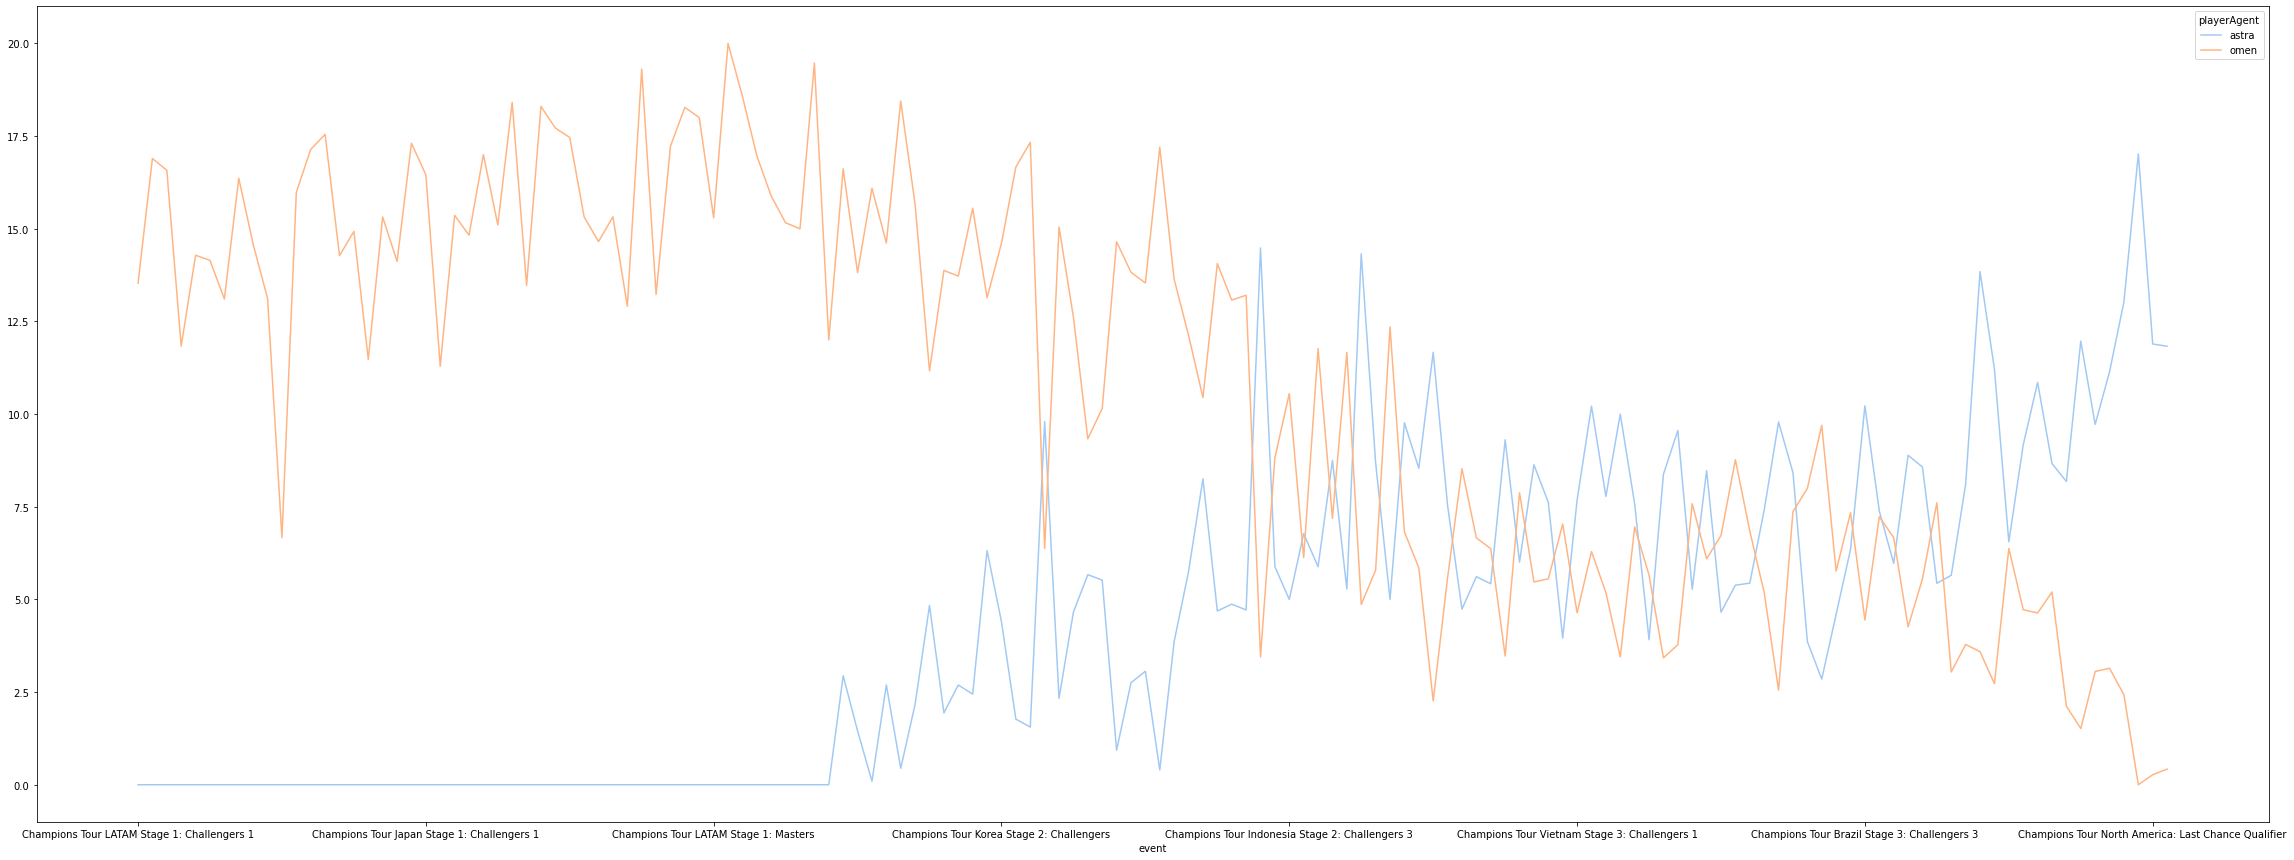

In [222]:
agentdata.plot(figsize=(40,15), y=['astra', 'omen'])
#plt.xticks(ticks=range(0,len(agentdata.index)),labels=agentdata.index.tolist(), rotation=45)
#not all events labeled in the X axis, uncomment above to see all labels

In [243]:
#finding top 5 most played agents for each map in each stage
#see win rates of teams that have 5,4,3,2,1, and 0 agents from the top 5 in that stage
#jan-april stage 1
#april-july stage2
#august-nov stage3
#december campions
data['stage']='unsorted'
data.loc[data['date'].between('2020-10-01','2021-03-01', inclusive=True), 'stage']='stage1'
data.loc[data['date'].between('2021-03-01','2021-08-01', inclusive=False), 'stage']='stage2'
data.loc[data['date'].between('2021-08-01','2021-10-15', inclusive=True), 'stage']='stage3'
data.loc[data['date'].between('2021-10-16','2021-12-15', inclusive=False), 'stage']='champions'

data.head()


,playerName,playerTeam,map,playerAgent,playerKills,playerDeaths,playerAssists,playerACS,playerADR,playerHS,...,matchID,gameID,opponent,result,winnerRoundsWon,loserRoundsWon,winningTeam,date,event,stage
0,stax,VS,Haven,breach,22.0,11.0,5.0,262.0,157.0,53.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
1,Rb,VS,Haven,skye,13.0,10.0,7.0,212.0,158.0,33.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
2,k1Ng,VS,Haven,killjoy,13.0,13.0,3.0,212.0,158.0,24.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
3,MaKo,VS,Haven,astra,13.0,8.0,6.0,209.0,154.0,24.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
4,BuZz,VS,Haven,jett,14.0,12.0,6.0,206.0,152.0,38.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions


In [203]:
agentpickrate = data.groupby(['stage', 'map'])['playerAgent'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
agentpickrate= agentpickrate.drop(index='unsorted')
agentpickrate
#fracture wasn't played a lot so averages are not very representative of all teams 

playerAgent             astra     breach  brimstone     cypher       jett  \
stage     map                                                               
champions Ascent    19.444444   0.000000   0.000000   4.444444  18.888889   
          Bind      16.153846   0.000000   3.846154   0.000000   9.230769   
          Breeze     0.000000   0.000000   0.476190  12.857143  20.000000   
          Fracture  15.000000  20.000000   3.333333  13.333333  11.666667   
          Haven     19.444444   7.777778   0.000000   6.666667  18.888889   
          Icebox     0.000000   0.000000   0.000000   0.000000  20.000000   
          Split     17.647059   6.470588   0.000000   7.058824  10.000000   
stage1    Ascent     0.000000   5.268240   2.467811   6.512876  16.984979   
          Bind       0.000000   5.267490   8.696845  13.799726  11.975309   
          Haven      0.000000   5.639205   2.514205  13.125000  16.619318   
          Icebox     0.000000   1.019108   1.464968   1.878981  17.133758   
          Split      0.000000  11.699346   2.941176   9.281046  13.442266   
stage2    Ascent     6.163201   3.162024   0.729698   4.954884  15.307964   
          Bind       5.309179   3.125604   6.879227   8.570048   8.705314   
          Breeze     0.881459   0.547112   0.516717   9.665653  18.176292   
          Haven      6.128064   3.981991   0.940470  11.685843  15.567784   
          Icebox     0.403818   0.374449   0.205580   0.690162  17.584435   
          Split      6.222222   8.365079   1.436508   9.047619  10.555556   
stage3    Ascent    13.349282   1.578947   0.095694   3.684211  17.846890   
          Bind      10.294118   3.088235   7.009804   1.813725   7.892157   
          Breeze     0.666667   0.095238   0.476190  12.571429  19.333333   
          Haven     12.994350   3.502825   0.282486   8.700565  19.039548   
          Icebox     0.182927   0.487805   0.060976   0.304878  19.512195   
          Split     13.877551   5.510204   0.748299   6.870748  11.904762   

playerAgent             kayo    killjoy       omen   phoenix       raze  \
stage     map                                                             
champions Ascent    5.555556  15.000000   0.555556  0.000000   0.555556   
          Bind      3.076923   0.769231   0.000000  0.000000  11.538462   
          Breeze    7.142857   5.238095   0.000000  0.000000   0.000000   
          Fracture  1.666667   6.666667   0.000000  0.000000  10.000000   
          Haven     1.111111  13.333333   0.555556  1.111111   1.666667   
          Icebox    1.666667   4.444444   0.000000  0.000000   2.777778   
          Split     1.176471   8.235294   2.352941  0.000000  14.117647   
stage1    Ascent    0.000000  12.328326  17.542918  3.047210   5.826180   
          Bind      0.000000   3.923182  11.179698  4.115226  15.349794   
          Haven     0.000000   5.454545  17.457386  6.363636   6.803977   
          Icebox    0.000000  12.579618  10.923567  0.796178   6.878981   
          Split     0.000000   9.237473  16.949891  1.111111  16.535948   
stage2    Ascent    0.823852  13.413103  13.079639  3.601412   5.861122   
          Bind      0.623188   3.681159   7.560386  2.342995  15.545894   
          Breeze    0.273556   2.765957   1.732523  0.364742   0.151976   
          Haven     0.900450   7.048524  12.946473  4.957479   5.932966   
          Icebox    0.323054   8.847283   4.082232  0.256975   4.126285   
          Split     0.738095   8.936508  12.079365  0.388889  15.904762   
stage3    Ascent    2.248804  14.210526   6.698565  2.488038   2.918660   
          Bind      1.813725   2.696078   2.647059  0.392157  15.588235   
          Breeze    0.476190   4.000000   0.571429  0.000000   0.095238   
          Haven     1.525424  10.169492   6.779661  3.559322   1.807910   
          Icebox    0.121951   9.146341   0.609756  0.000000   2.195122   
          Split     2.244898  10.748299   5.374150  0.068027  13.265306   

playerAgent             reyna       sage      

Text(0.5, 1.0, 'Champions Agent Pick Rates')

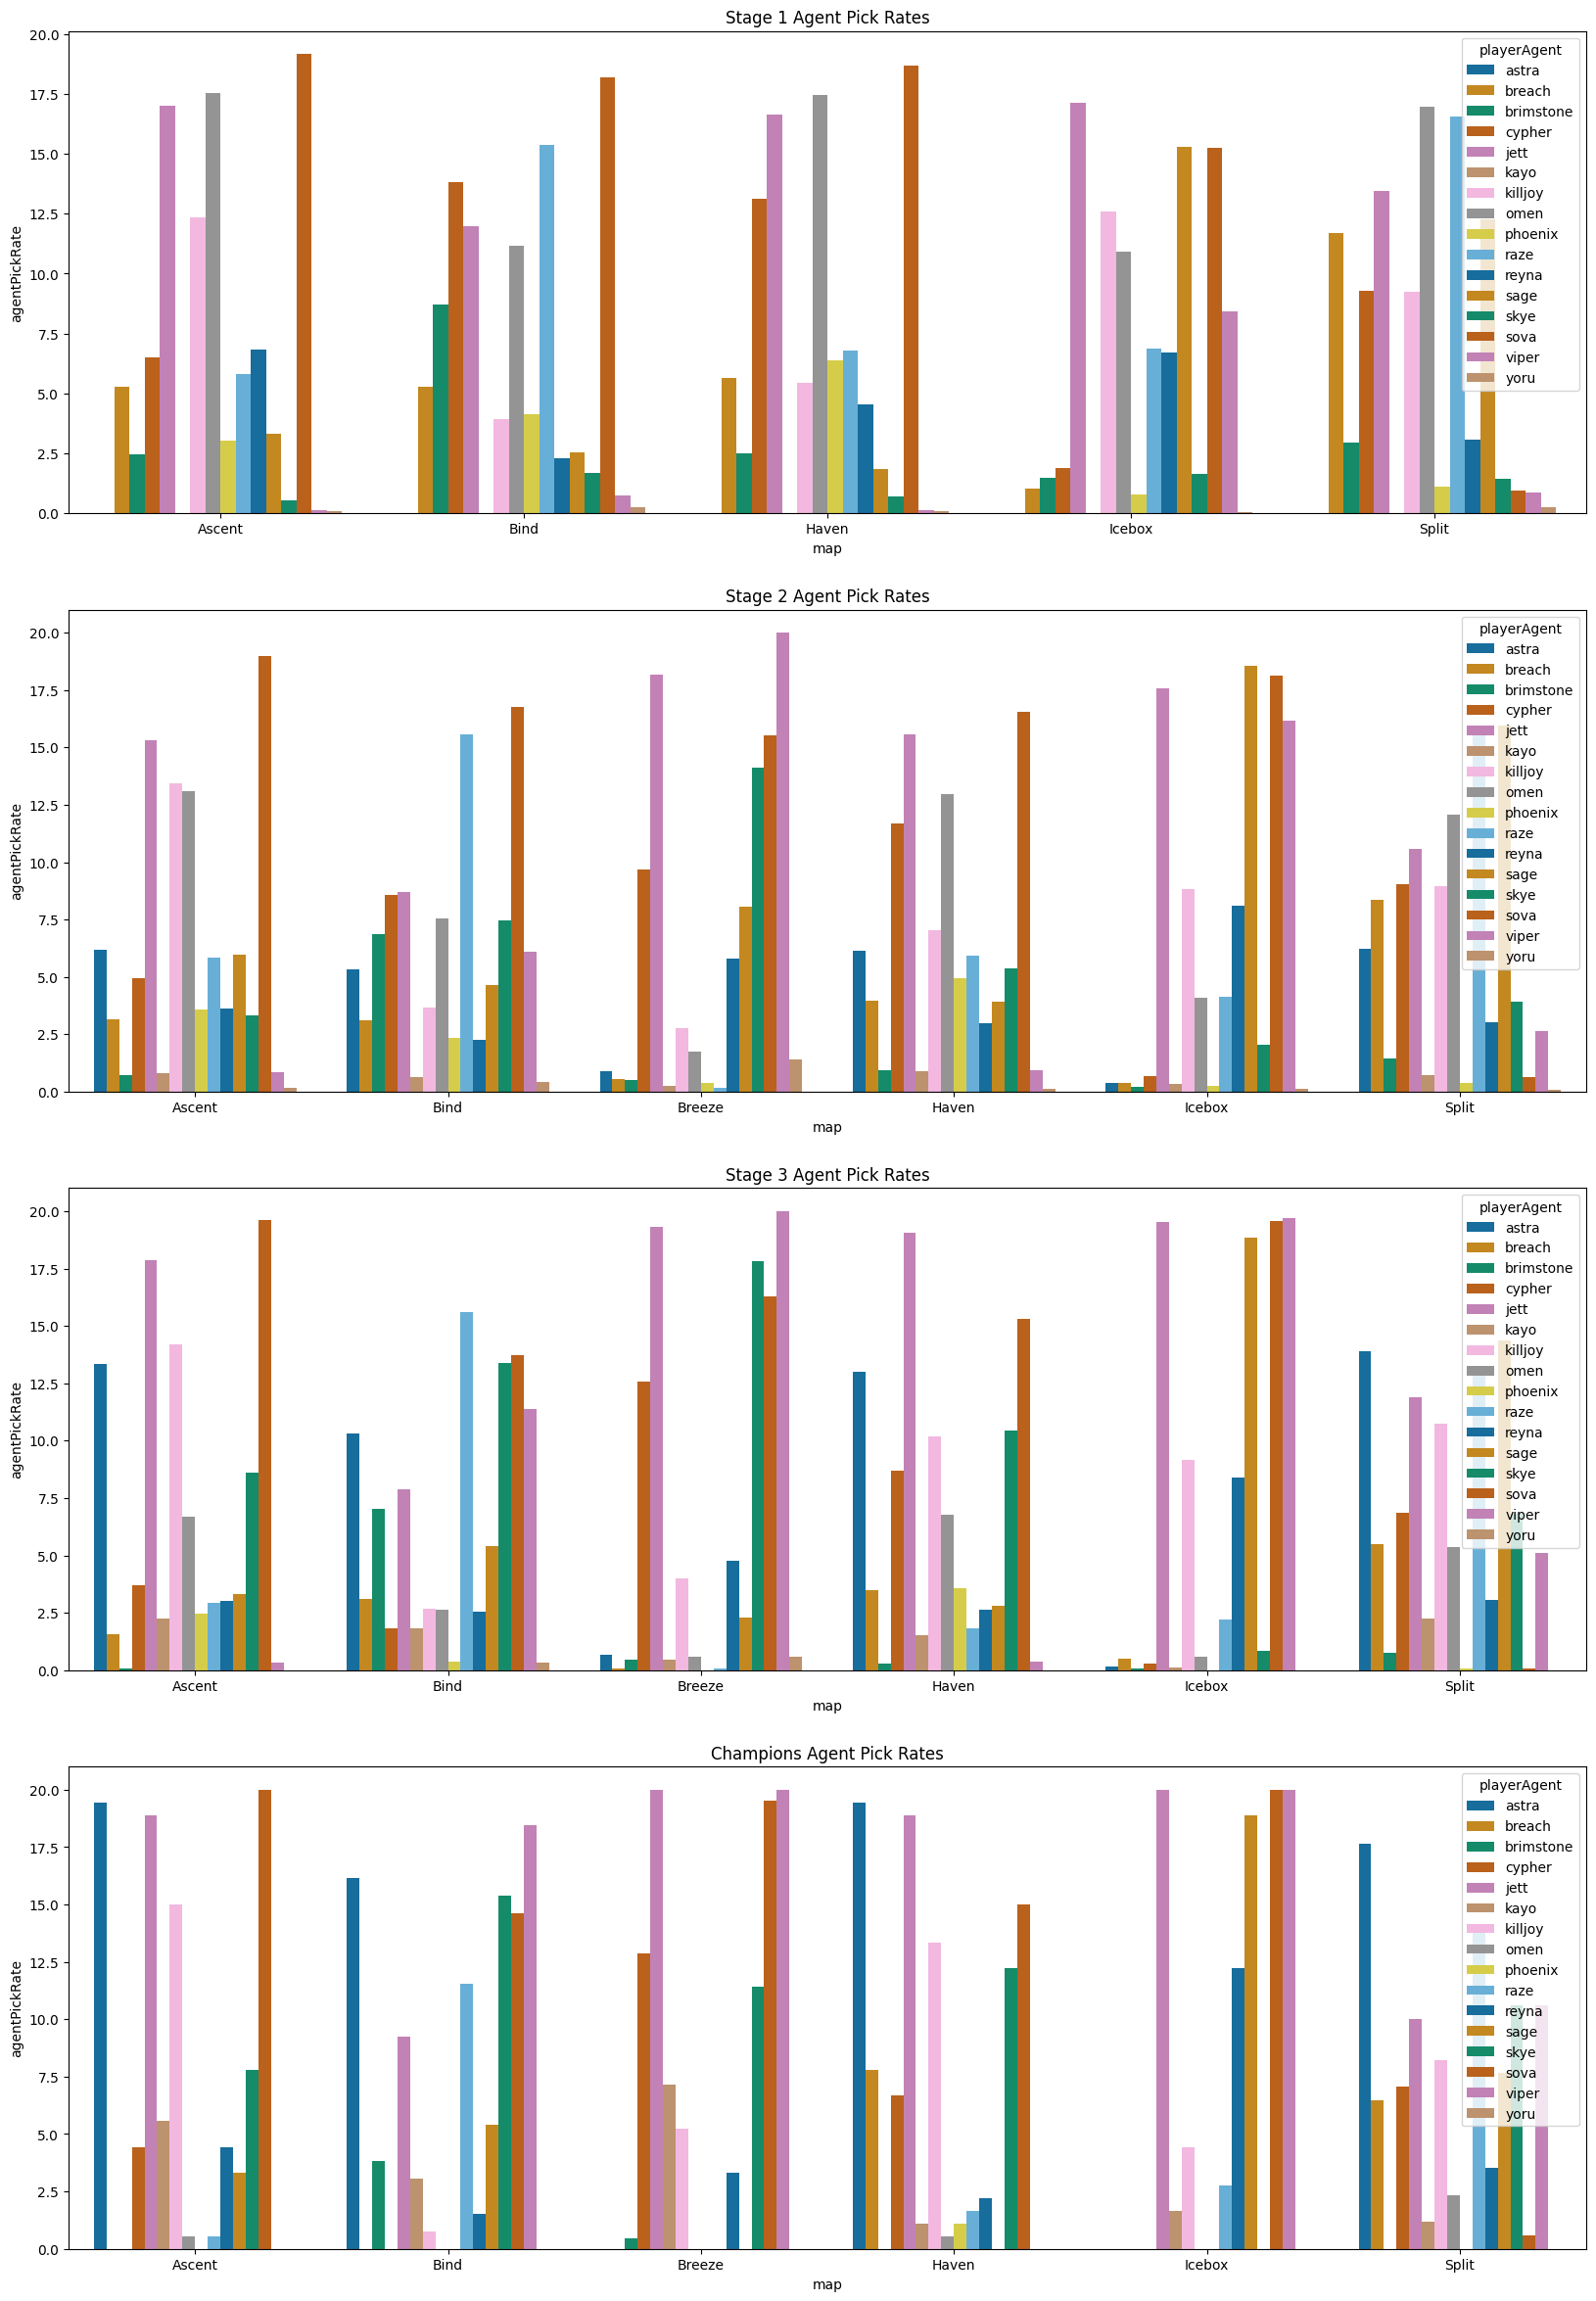

In [221]:
fig, ax = plt.subplots(figsize=(20, 30), dpi=100, nrows=4)
plotdata_stage1 = pd.melt(agentpickrate.loc['stage1'].reset_index(), id_vars='map', value_name='agentPickRate')
plotdata_stage2 = pd.melt(agentpickrate.loc['stage2'].reset_index(), id_vars='map', value_name='agentPickRate')
plotdata_stage3 = pd.melt(agentpickrate.loc['stage3'].reset_index(), id_vars='map', value_name='agentPickRate')
plotdata_champions = pd.melt(agentpickrate.loc['champions'].reset_index(), id_vars='map', value_name='agentPickRate')
plotdata_champions = plotdata_champions.drop(plotdata_champions[plotdata_champions['map']=='Fracture'].index)


sns.barplot(data=plotdata_stage1, ax=ax[0], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Stage 1 Agent Pick Rates')
sns.barplot(data=plotdata_stage2, ax=ax[1], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Stage 2 Agent Pick Rates')
sns.barplot(data=plotdata_stage3, ax=ax[2], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Stage 3 Agent Pick Rates')
sns.barplot(data=plotdata_champions, ax=ax[3], x='map', hue='playerAgent', y='agentPickRate', palette='colorblind', alpha=1).set_title('Champions Agent Pick Rates')

In [253]:
#next do winrates of teams that played in valorant champions
vc_teams = data[data['event']=='VALORANT Champions']['playerTeam'].unique()
teamData = data.groupby(['playerTeam', 'map', 'stage'])['result'].value_counts(normalize=True).mul(100).unstack(fill_value=0).reset_index()
teamData = teamData[teamData['playerTeam'].isin(vc_teams)]

Text(0.5, 1.0, 'Win Rate Champions')

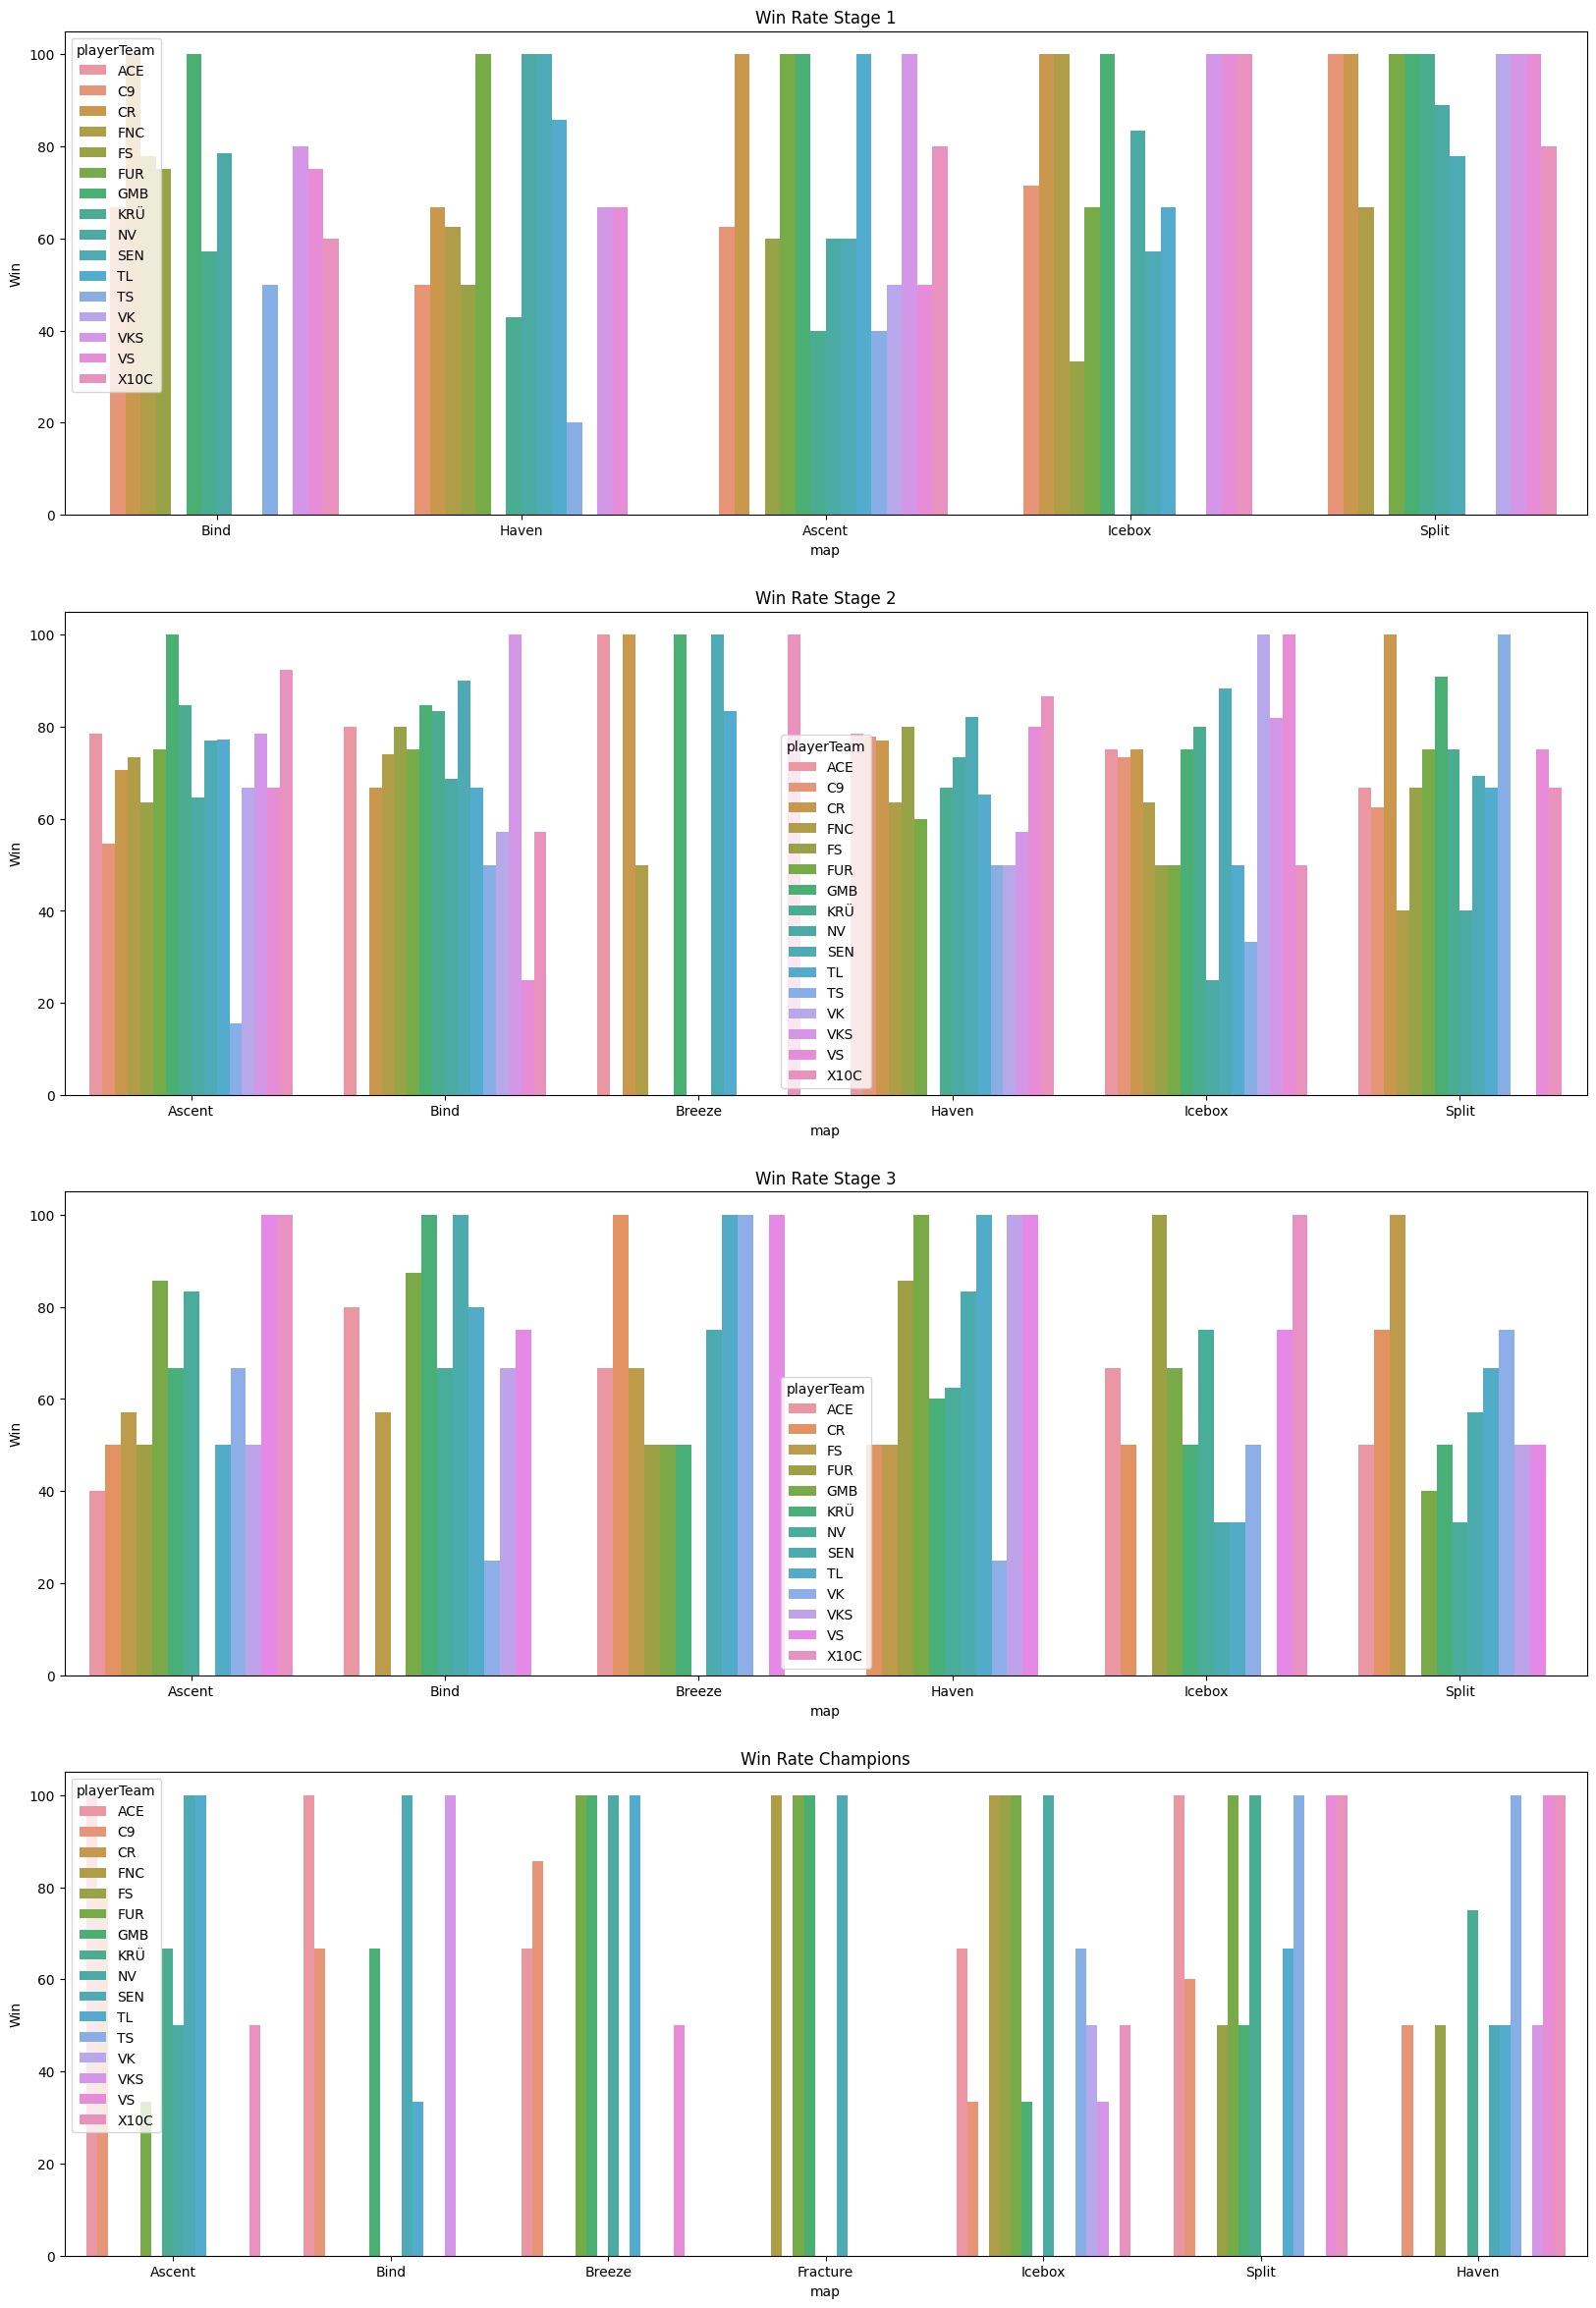

In [257]:
#plotting win rate for each team

stage1 = teamData[teamData['stage']=='stage1']
stage2 = teamData[teamData['stage']=='stage2']
stage3 = teamData[teamData['stage']=='stage3']
champions = teamData[teamData['stage']=='champions']
fig, ax = plt.subplots(figsize=(20, 30), dpi=100, nrows=4)

sns.barplot(data=stage1, x='map', y='Win', hue='playerTeam', ax=ax[0]).set_title('Win Rate Stage 1')
sns.barplot(data=stage2, x='map', y='Win', hue='playerTeam', ax=ax[1]).set_title('Win Rate Stage 2')
sns.barplot(data=stage3, x='map', y='Win', hue='playerTeam', ax=ax[2]).set_title('Win Rate Stage 3')
sns.barplot(data=champions, x='map', y='Win', hue='playerTeam', ax=ax[3]).set_title('Win Rate Champions')
#need to account for the fact that some maps are played more frequently than others
#might want to import bans and pick rates for each map